In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Read the all_sentences.tsv file
import pandas as pd
data = pd.read_csv("/content/caste_idterms.tsv", delimiter="\t")
data

,identity term
0,brahmin
1,dalit
2,khsatirya
3,vaishya
4,obc
5,sc/st
6,shudra


In [77]:
# Create a new df for this gender-biased data
new_gender_bias_df = pd.DataFrame(columns=['identity term'])

for index, row in data.iterrows():
    # Extract identity term
    identity_term = row['identity term']

    # Assuming 'identity term' is structured as: 'term.index.pronoun.gender'
    # Split the identity term string
    parts = identity_term.split('.')

    # Check if the identity term has the expected structure
    if len(parts) == 4:
        term = parts[0]
        term_index = int(parts[1])
        term_pronoun = int(parts[2])
        gender = parts[3]

        # Get the biased pronoun for the identity term from the dictionary
        biased_pronoun = professions.get(term, None)

        # If term_pronoun is 0 and the biased pronoun matches the gender
        if term_pronoun == 0 and biased_pronoun == gender:
            new_gender_bias_df.loc[len(new_gender_bias_df.index)] = [row['identity term']]
    else:
        print(f"Unexpected format for identity term: {identity_term}")

new_gender_bias_df.head()


Unexpected format for identity term: brahmin
Unexpected format for identity term: dalit
Unexpected format for identity term: khsatirya
Unexpected format for identity term: vaishya
Unexpected format for identity term: obc
Unexpected format for identity term: sc/st
Unexpected format for identity term: shudra


,identity term


In [78]:
import pandas as pd

# Sample data for demonstration with the provided identity terms
data = pd.DataFrame({
    'index': [0, 1, 2, 4, 5, 6, 3],
    'identity term': ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya'],
    'sentence': [
        'Sentence about brahmin',
        'Sentence about dalit',
        'Sentence about khsatirya',
        'Sentence about obc',
        'Sentence about sc/st',
        'Sentence about shudra',
        'Sentence about vaishya'
    ]
})

# Professions dictionary for demonstration (assuming the identity term corresponds to a gender pronoun)
professions = {
    'brahmin': 'f',
    'dalit': 'm',
    'khsatirya': 'm',
    'obc': 'f',
    'sc/st': 'm',
    'shudra': 'f',
    'vaishya': 'f'
}

# Modify the 'identity term' in 'data' to include additional structured information
# Format: 'term.index.pronoun.gender'
structured_terms = [
    'brahmin.0.0.f',
    'dalit.1.0.m',
    'khsatirya.2.0.m',
    'obc.4.0.f',
    'sc/st.5.0.m',
    'shudra.6.0.f',
    'vaishya.3.0.f'
]

# Update the 'identity term' column with the structured terms
data['identity term'] = structured_terms

# Create a new df for this gender-biased data
new_gender_bias_df = pd.DataFrame(columns=['identity term'])

for index, row in data.iterrows():
    identity_term = row['identity term']

    # Split the identity term string
    parts = identity_term.split('.')

    # Print the identity term and parts for debugging
    print(f"Processing identity term: {identity_term}")
    print(f"Parts: {parts}")

    # Check if the identity term has the expected structure
    if len(parts) == 4:
        term = parts[0]
        term_index = int(parts[1])
        term_pronoun = int(parts[2])
        gender = parts[3]

        # Get the biased pronoun for the identity term from the dictionary
        biased_pronoun = professions.get(term, None)

        # Print extracted values for debugging
        print(f"Term: {term}, Term Index: {term_index}, Term Pronoun: {term_pronoun}, Gender: {gender}")
        print(f"Biased Pronoun: {biased_pronoun}")

        # If term_pronoun is 0 and the biased pronoun matches the gender
        if term_pronoun == 0 and biased_pronoun == gender:
            new_gender_bias_df.loc[len(new_gender_bias_df.index)] = [row['identity term']]
            print(f"Added: {row['identity term']}")
    else:
        print(f"Unexpected format for identity term: {identity_term}")

# Print the new DataFrame for debugging
print("New Gender Bias DataFrame:")
print(new_gender_bias_df)

# Convert the 'identity term' column into a list for training
list_train = new_gender_bias_df['identity term'].tolist()
print("Length of list_train: ", len(list_train))
print(list_train[:])


Processing identity term: brahmin.0.0.f
Parts: ['brahmin', '0', '0', 'f']
Term: brahmin, Term Index: 0, Term Pronoun: 0, Gender: f
Biased Pronoun: f
Added: brahmin.0.0.f
Processing identity term: dalit.1.0.m
Parts: ['dalit', '1', '0', 'm']
Term: dalit, Term Index: 1, Term Pronoun: 0, Gender: m
Biased Pronoun: m
Added: dalit.1.0.m
Processing identity term: khsatirya.2.0.m
Parts: ['khsatirya', '2', '0', 'm']
Term: khsatirya, Term Index: 2, Term Pronoun: 0, Gender: m
Biased Pronoun: m
Added: khsatirya.2.0.m
Processing identity term: obc.4.0.f
Parts: ['obc', '4', '0', 'f']
Term: obc, Term Index: 4, Term Pronoun: 0, Gender: f
Biased Pronoun: f
Added: obc.4.0.f
Processing identity term: sc/st.5.0.m
Parts: ['sc/st', '5', '0', 'm']
Term: sc/st, Term Index: 5, Term Pronoun: 0, Gender: m
Biased Pronoun: m
Added: sc/st.5.0.m
Processing identity term: shudra.6.0.f
Parts: ['shudra', '6', '0', 'f']
Term: shudra, Term Index: 6, Term Pronoun: 0, Gender: f
Biased Pronoun: f
Added: shudra.6.0.f
Processi

In [68]:

from transformers import BertTokenizer, TFBertForMaskedLM
import tensorflow as tf
import os
import numpy as np
import re
import matplotlib.pyplot as plt

In [69]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForMaskedLM.from_pretrained('bert-base-uncased')

All PyTorch model weights were used when initializing TFBertForMaskedLM.

All the weights of TFBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


In [70]:
model.summary()

Model: "tf_bert_for_masked_lm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108891648 
                                                                 
 mlm___cls (TFBertMLMHead)   multiple                  24459834  
                                                                 
Total params: 109514298 (417.76 MB)
Trainable params: 109514298 (417.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
def clean_text(line):
    line = re.sub(r'-+',' ',line)
    line = re.sub(r'[^a-zA-Z, ]+'," ",line)
    line = re.sub(r'[ ]+'," ",line)
    line += "."
    return line

In [85]:
import torch
from torch.nn.utils.rnn import pad_sequence

class CustomDataset(Dataset):
    def __init__(self, texts, tokenizer):
        self.texts = texts
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        input_ids = inputs.input_ids.squeeze(0)  # Ensure to squeeze to remove extra dimension
        attention_mask = inputs.attention_mask.squeeze(0)  # Ensure to squeeze to remove extra dimension
        return input_ids, attention_mask

def collate_fn(batch):
    # batch is a list of tuples (input_ids, attention_mask)
    input_ids = [item[0] for item in batch]
    attention_masks = [item[1] for item in batch]

    # Pad sequences within batch to the maximum length
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_masks = pad_sequence(attention_masks, batch_first=True, padding_value=0)  # Assuming 0 for attention_mask padding

    return input_ids, attention_masks

# Create dataset and data loader with collate_fn
dataset = CustomDataset(list_train, tokenizer)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)


In [89]:
import torch
from transformers import BertTokenizer, BertForMaskedLM, AdamW
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import pandas as pd

# Sample data for demonstration with the provided identity terms
data = pd.DataFrame({
    'index': [0, 1, 2, 4, 5, 6, 3],
    'identity term': ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya'],
    'sentence': [
        'Sentence about brahmin',
        'Sentence about dalit',
        'Sentence about khsatirya',
        'Sentence about obc',
        'Sentence about sc/st',
        'Sentence about shudra',
        'Sentence about vaishya'
    ]
})

# Professions dictionary for demonstration (assuming the identity term corresponds to a gender pronoun)
professions = {
    'brahmin': 'f',
    'dalit': 'm',
    'khsatirya': 'm',
    'obc': 'f',
    'sc/st': 'm',
    'shudra': 'f',
    'vaishya': 'f'
}

# Modify the 'identity term' in 'data' to include additional structured information
# Format: 'term.index.pronoun.gender'
structured_terms = [
    'brahmin.0.0.f',
    'dalit.1.0.m',
    'khsatirya.2.0.m',
    'obc.4.0.f',
    'sc/st.5.0.m',
    'shudra.6.0.f',
    'vaishya.3.0.f'
]

# Update the 'identity term' column with the structured terms
data['identity term'] = structured_terms

# Create a new df for this gender-biased data
new_gender_bias_df = pd.DataFrame(columns=['identity term'])

for index, row in data.iterrows():
    identity_term = row['identity term']

    # Split the identity term string
    parts = identity_term.split('.')

    # Check if the identity term has the expected structure
    if len(parts) == 4:
        term = parts[0]
        term_index = int(parts[1])
        term_pronoun = int(parts[2])
        gender = parts[3]

        # Get the biased pronoun for the identity term from the dictionary
        biased_pronoun = professions.get(term, None)

        # If term_pronoun is 0 and the biased pronoun matches the gender
        if term_pronoun == 0 and biased_pronoun == gender:
            new_gender_bias_df.loc[len(new_gender_bias_df.index)] = [row['identity term']]

# Convert the 'identity term' column into a list for training
list_train = new_gender_bias_df['identity term'].tolist()

# Initialize BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Example Dataset class for training
class CustomDataset(Dataset):
    def __init__(self, texts, tokenizer):
        self.texts = texts
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        input_ids = inputs.input_ids.squeeze(0)  # Ensure to squeeze to remove extra dimension
        attention_mask = inputs.attention_mask.squeeze(0)  # Ensure to squeeze to remove extra dimension
        return input_ids, attention_mask

def collate_fn(batch):
    # batch is a list of tuples (input_ids, attention_mask)
    input_ids = [item[0] for item in batch]
    attention_masks = [item[1] for item in batch]

    # Pad sequences within batch to the maximum length
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_masks = pad_sequence(attention_masks, batch_first=True, padding_value=0)  # Assuming 0 for attention_mask padding

    return input_ids, attention_masks

# Create dataset and data loader with collate_fn
dataset = CustomDataset(list_train, tokenizer)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop (example)
model.train()
for epoch in range(100):  # adjust as needed
    total_loss = 0
    for inputs_ids, attention_mask in train_loader:
        inputs_ids, attention_mask = inputs_ids.to(device), attention_mask.to(device)

        # Forward pass
        outputs = model(input_ids=inputs_ids, attention_mask=attention_mask, labels=inputs_ids)
        loss = outputs.loss

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Average Loss: {total_loss / len(train_loader)}")


# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Save the fine-tuned model if needed
# model.save_pretrained('path_to_save_directory')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Average Loss: 6.0081915855407715
Epoch 2, Average Loss: 5.171833515167236
Epoch 3, Average Loss: 4.524707317352295
Epoch 4, Average Loss: 4.282735347747803
Epoch 5, Average Loss: 4.07700777053833
Epoch 6, Average Loss: 3.95894193649292
Epoch 7, Average Loss: 3.8791940212249756
Epoch 8, Average Loss: 3.785695791244507
Epoch 9, Average Loss: 3.6362929344177246
Epoch 10, Average Loss: 3.5988306999206543
Epoch 11, Average Loss: 3.532921552658081
Epoch 12, Average Loss: 3.42309308052063
Epoch 13, Average Loss: 3.3241755962371826
Epoch 14, Average Loss: 3.3061511516571045
Epoch 15, Average Loss: 3.2592101097106934
Epoch 16, Average Loss: 3.1145222187042236
Epoch 17, Average Loss: 3.0897042751312256
Epoch 18, Average Loss: 3.0135605335235596
Epoch 19, Average Loss: 2.83184814453125
Epoch 20, Average Loss: 2.845202922821045
Epoch 21, Average Loss: 2.6924235820770264
Epoch 22, Average Loss: 2.6133015155792236
Epoch 23, Average Loss: 2.565117597579956
Epoch 24, Average Loss: 2.433959007

NameError: name 'train_losses' is not defined

<Figure size 1000x600 with 0 Axes>

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Average Loss: 5.913498878479004
Epoch 2, Average Loss: 5.129298686981201
Epoch 3, Average Loss: 4.513036251068115
Epoch 4, Average Loss: 4.226346492767334
Epoch 5, Average Loss: 4.073818206787109
Epoch 6, Average Loss: 3.9511613845825195
Epoch 7, Average Loss: 3.8525354862213135
Epoch 8, Average Loss: 3.7727696895599365
Epoch 9, Average Loss: 3.667451858520508
Epoch 10, Average Loss: 3.5871596336364746
Epoch 11, Average Loss: 3.509122610092163
Epoch 12, Average Loss: 3.4559879302978516
Epoch 13, Average Loss: 3.402233600616455
Epoch 14, Average Loss: 3.2769525051116943
Epoch 15, Average Loss: 3.2484288215637207
Epoch 16, Average Loss: 3.120581865310669
Epoch 17, Average Loss: 3.0198206901550293
Epoch 18, Average Loss: 2.930063247680664
Epoch 19, Average Loss: 2.901158094406128
Epoch 20, Average Loss: 2.832724094390869
Epoch 21, Average Loss: 2.653022050857544
Epoch 22, Average Loss: 2.6253108978271484
Epoch 23, Average Loss: 2.555065870285034
Epoch 24, Average Loss: 2.58364248

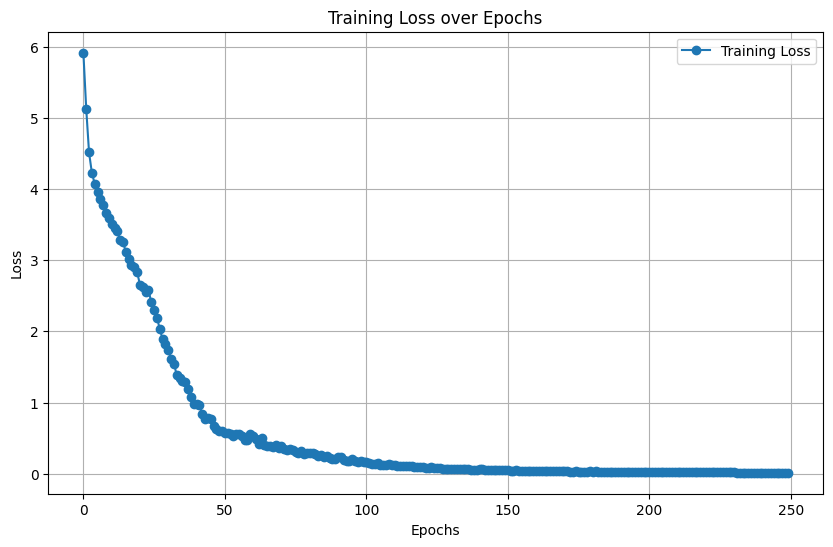

In [93]:
import torch
from transformers import BertTokenizer, BertForMaskedLM, AdamW
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration with the provided identity terms
data = pd.DataFrame({
    'index': [0, 1, 2, 4, 5, 6, 3],
    'identity term': ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya'],
    'sentence': [
        'Sentence about brahmin',
        'Sentence about dalit',
        'Sentence about khsatirya',
        'Sentence about obc',
        'Sentence about sc/st',
        'Sentence about shudra',
        'Sentence about vaishya'
    ]
})

# Professions dictionary for demonstration (assuming the identity term corresponds to a gender pronoun)
professions = {
    'brahmin': 'f',
    'dalit': 'm',
    'khsatirya': 'm',
    'obc': 'f',
    'sc/st': 'm',
    'shudra': 'f',
    'vaishya': 'f'
}

# Modify the 'identity term' in 'data' to include additional structured information
# Format: 'term.index.pronoun.gender'
structured_terms = [
    'brahmin.0.0.f',
    'dalit.1.0.m',
    'khsatirya.2.0.m',
    'obc.4.0.f',
    'sc/st.5.0.m',
    'shudra.6.0.f',
    'vaishya.3.0.f'
]

# Update the 'identity term' column with the structured terms
data['identity term'] = structured_terms

# Create a new df for this gender-biased data
new_gender_bias_df = pd.DataFrame(columns=['identity term'])

for index, row in data.iterrows():
    identity_term = row['identity term']

    # Split the identity term string
    parts = identity_term.split('.')

    # Check if the identity term has the expected structure
    if len(parts) == 4:
        term = parts[0]
        term_index = int(parts[1])
        term_pronoun = int(parts[2])
        gender = parts[3]

        # Get the biased pronoun for the identity term from the dictionary
        biased_pronoun = professions.get(term, None)

        # If term_pronoun is 0 and the biased pronoun matches the gender
        if term_pronoun == 0 and biased_pronoun == gender:
            new_gender_bias_df.loc[len(new_gender_bias_df.index)] = [row['identity term']]

# Convert the 'identity term' column into a list for training
list_train = new_gender_bias_df['identity term'].tolist()

# Initialize BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Example Dataset class for training
class CustomDataset(Dataset):
    def __init__(self, texts, tokenizer):
        self.texts = texts
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        input_ids = inputs.input_ids.squeeze(0)  # Ensure to squeeze to remove extra dimension
        attention_mask = inputs.attention_mask.squeeze(0)  # Ensure to squeeze to remove extra dimension
        return input_ids, attention_mask

def collate_fn(batch):
    # batch is a list of tuples (input_ids, attention_mask)
    input_ids = [item[0] for item in batch]
    attention_masks = [item[1] for item in batch]

    # Pad sequences within batch to the maximum length
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_masks = pad_sequence(attention_masks, batch_first=True, padding_value=0)  # Assuming 0 for attention_mask padding

    return input_ids, attention_masks

# Create dataset and data loader with collate_fn
dataset = CustomDataset(list_train, tokenizer)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Lists to store training statistics
train_losses = []

# Training loop (example)
model.train()
for epoch in range(250):  # adjust as needed
    total_loss = 0
    for inputs_ids, attention_mask in train_loader:
        inputs_ids, attention_mask = inputs_ids.to(device), attention_mask.to(device)

        # Forward pass
        outputs = model(input_ids=inputs_ids, attention_mask=attention_mask, labels=inputs_ids)
        loss = outputs.loss

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculate average loss for epoch
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    print(f"Epoch {epoch + 1}, Average Loss: {avg_train_loss}")

# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Save the fine-tuned model if needed
# model.save_pretrained('path_to_save_directory')


# Early stopping

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Average Loss: 5.979607582092285
Epoch 2, Average Loss: 5.084145545959473
Epoch 3, Average Loss: 4.520577430725098
Epoch 4, Average Loss: 4.160309314727783
Epoch 5, Average Loss: 4.037713527679443
Epoch 6, Average Loss: 3.9736568927764893
Epoch 7, Average Loss: 3.7941832542419434
Epoch 8, Average Loss: 3.775509834289551
Epoch 9, Average Loss: 3.589188814163208
Epoch 10, Average Loss: 3.5475704669952393
Epoch 11, Average Loss: 3.4952785968780518
Epoch 12, Average Loss: 3.3913464546203613
Epoch 13, Average Loss: 3.293557643890381
Epoch 14, Average Loss: 3.2102153301239014
Epoch 15, Average Loss: 3.0960617065429688
Epoch 16, Average Loss: 3.0625691413879395
Epoch 17, Average Loss: 2.9943900108337402
Epoch 18, Average Loss: 2.948218822479248
Epoch 19, Average Loss: 2.8673360347747803
Epoch 20, Average Loss: 2.7469289302825928
Epoch 21, Average Loss: 2.6761176586151123
Epoch 22, Average Loss: 2.608773946762085
Epoch 23, Average Loss: 2.5399863719940186
Epoch 24, Average Loss: 2.4173

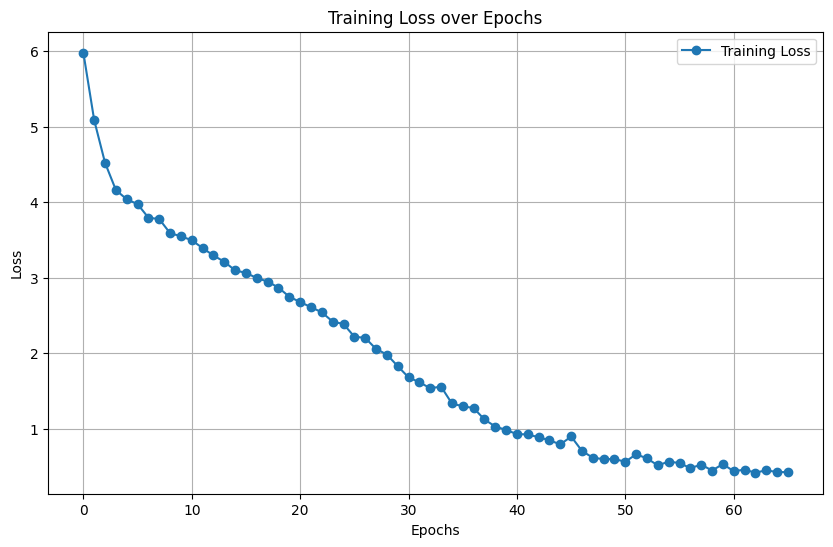

Model and tokenizer saved to /home/user/my_models/bert_finetuned/


In [96]:
import torch
from transformers import BertTokenizer, BertForMaskedLM, AdamW
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration with the provided identity terms
data = pd.DataFrame({
    'index': [0, 1, 2, 4, 5, 6, 3],
    'identity term': ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya'],
    'sentence': [
        'Sentence about brahmin',
        'Sentence about dalit',
        'Sentence about khsatirya',
        'Sentence about obc',
        'Sentence about sc/st',
        'Sentence about shudra',
        'Sentence about vaishya'
    ]
})

# Professions dictionary for demonstration (assuming the identity term corresponds to a gender pronoun)
professions = {
    'brahmin': 'f',
    'dalit': 'm',
    'khsatirya': 'm',
    'obc': 'f',
    'sc/st': 'm',
    'shudra': 'f',
    'vaishya': 'f'
}

# Modify the 'identity term' in 'data' to include additional structured information
# Format: 'term.index.pronoun.gender'
structured_terms = [
    'brahmin.0.0.f',
    'dalit.1.0.m',
    'khsatirya.2.0.m',
    'obc.4.0.f',
    'sc/st.5.0.m',
    'shudra.6.0.f',
    'vaishya.3.0.f'
]

# Update the 'identity term' column with the structured terms
data['identity term'] = structured_terms

# Create a new df for this gender-biased data
new_gender_bias_df = pd.DataFrame(columns=['identity term'])

for index, row in data.iterrows():
    identity_term = row['identity term']

    # Split the identity term string
    parts = identity_term.split('.')

    # Check if the identity term has the expected structure
    if len(parts) == 4:
        term = parts[0]
        term_index = int(parts[1])
        term_pronoun = int(parts[2])
        gender = parts[3]

        # Get the biased pronoun for the identity term from the dictionary
        biased_pronoun = professions.get(term, None)

        # If term_pronoun is 0 and the biased pronoun matches the gender
        if term_pronoun == 0 and biased_pronoun == gender:
            new_gender_bias_df.loc[len(new_gender_bias_df.index)] = [row['identity term']]

# Convert the 'identity term' column into a list for training
list_train = new_gender_bias_df['identity term'].tolist()

# Initialize BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Example Dataset class for training
class CustomDataset(Dataset):
    def __init__(self, texts, tokenizer):
        self.texts = texts
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        input_ids = inputs.input_ids.squeeze(0)  # Ensure to squeeze to remove extra dimension
        attention_mask = inputs.attention_mask.squeeze(0)  # Ensure to squeeze to remove extra dimension
        return input_ids, attention_mask

def collate_fn(batch):
    # batch is a list of tuples (input_ids, attention_mask)
    input_ids = [item[0] for item in batch]
    attention_masks = [item[1] for item in batch]

    # Pad sequences within batch to the maximum length
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_masks = pad_sequence(attention_masks, batch_first=True, padding_value=0)  # Assuming 0 for attention_mask padding

    return input_ids, attention_masks

# Create dataset and data loader with collate_fn
dataset = CustomDataset(list_train, tokenizer)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Early stopping parameters
patience = 3
min_delta = 0.001
best_loss = float('inf')
epochs_without_improvement = 0

# Lists to store training statistics
train_losses = []

# Training loop with early stopping
model.train()
for epoch in range(150):  # example: train for 10 epochs
    total_loss = 0
    for inputs_ids, attention_mask in train_loader:
        inputs_ids, attention_mask = inputs_ids.to(device), attention_mask.to(device)

        # Forward pass
        outputs = model(input_ids=inputs_ids, attention_mask=attention_mask, labels=inputs_ids)
        loss = outputs.loss

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculate average loss for epoch
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    print(f"Epoch {epoch + 1}, Average Loss: {avg_train_loss}")

    # Check for early stopping
    if avg_train_loss < best_loss - min_delta:
        best_loss = avg_train_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f'Early stopping after epoch {epoch + 1}')
            break

# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()



# Save the fine-tuned model
save_directory = '/home/user/my_models/bert_finetuned/'
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")


In [98]:
!git clone https://github.com/nyu-mll/crows-pairs.git

fatal: destination path 'crows-pairs' already exists and is not an empty directory.


In [99]:
!python -W ignore /content/crows-pairs/metric.py --input_file "/content/crows-pairs/data/crows_pairs_anonymized.csv" --lm_model "sentence-transformers/all-MiniLM-L6-v2" --output_file "temp.txt"

Evaluating:
Input: /content/crows-pairs/data/crows_pairs_anonymized.csv
Model: sentence-transformers/all-MiniLM-L6-v2
Traceback (most recent call last):
  File "/content/crows-pairs/metric.py", line 285, in <module>
    evaluate(args)
  File "/content/crows-pairs/metric.py", line 173, in evaluate
    df_data = read_data(args.input_file)
  File "/content/crows-pairs/metric.py", line 45, in read_data
    df_data = df_data.append(df_item, ignore_index=True)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 5989, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'DataFrame' object has no attribute 'append'. Did you mean: '_append'?


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Average Loss: 6.163160800933838
Epoch 2, Average Loss: 5.2572550773620605
Epoch 3, Average Loss: 4.845203399658203
Model and tokenizer saved to path_to_save_directory


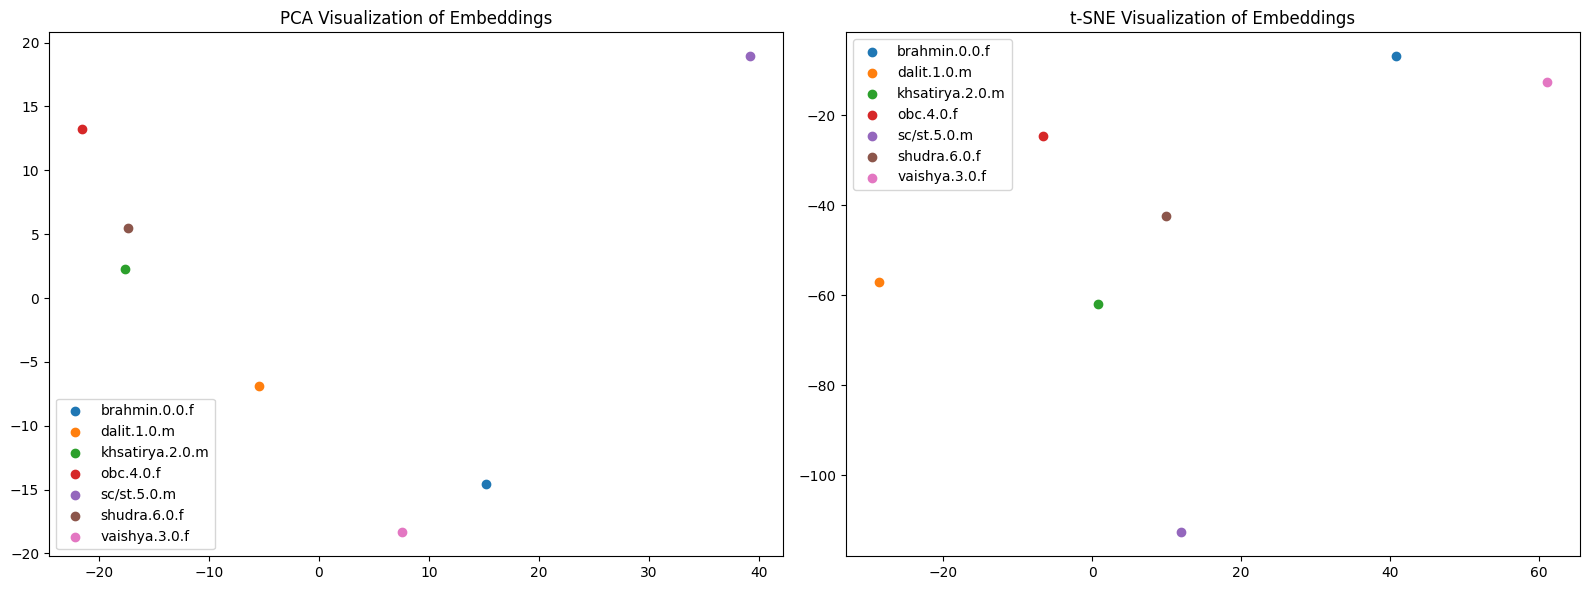

In [104]:
import torch
from transformers import BertTokenizer, BertForMaskedLM, AdamW
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Sample data for demonstration with the provided identity terms
data = pd.DataFrame({
    'index': [0, 1, 2, 4, 5, 6, 3],
    'identity term': ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya'],
    'sentence': [
        'Sentence about brahmin',
        'Sentence about dalit',
        'Sentence about khsatirya',
        'Sentence about obc',
        'Sentence about sc/st',
        'Sentence about shudra',
        'Sentence about vaishya'
    ]
})

# Professions dictionary for demonstration (assuming the identity term corresponds to a gender pronoun)
professions = {
    'brahmin': 'f',
    'dalit': 'm',
    'khsatirya': 'm',
    'obc': 'f',
    'sc/st': 'm',
    'shudra': 'f',
    'vaishya': 'f'
}

# Modify the 'identity term' in 'data' to include additional structured information
# Format: 'term.index.pronoun.gender'
structured_terms = [
    'brahmin.0.0.f',
    'dalit.1.0.m',
    'khsatirya.2.0.m',
    'obc.4.0.f',
    'sc/st.5.0.m',
    'shudra.6.0.f',
    'vaishya.3.0.f'
]

# Update the 'identity term' column with the structured terms
data['identity term'] = structured_terms

# Create a new df for this gender-biased data
new_gender_bias_df = pd.DataFrame(columns=['identity term'])

for index, row in data.iterrows():
    identity_term = row['identity term']

    # Split the identity term string
    parts = identity_term.split('.')

    # Check if the identity term has the expected structure
    if len(parts) == 4:
        term = parts[0]
        term_index = int(parts[1])
        term_pronoun = int(parts[2])
        gender = parts[3]

        # Get the biased pronoun for the identity term from the dictionary
        biased_pronoun = professions.get(term, None)

        # If term_pronoun is 0 and the biased pronoun matches the gender
        if term_pronoun == 0 and biased_pronoun == gender:
            new_gender_bias_df.loc[len(new_gender_bias_df.index)] = [row['identity term']]

# Convert the 'identity term' column into a list for training
list_train = new_gender_bias_df['identity term'].tolist()

# Initialize BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Example Dataset class for training
class CustomDataset(Dataset):
    def __init__(self, texts, tokenizer):
        self.texts = texts
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        input_ids = inputs.input_ids.squeeze(0)  # Ensure to squeeze to remove extra dimension
        attention_mask = inputs.attention_mask.squeeze(0)  # Ensure to squeeze to remove extra dimension
        return input_ids, attention_mask

def collate_fn(batch):
    # batch is a list of tuples (input_ids, attention_mask)
    input_ids = [item[0] for item in batch]
    attention_masks = [item[1] for item in batch]

    # Pad sequences within batch to the maximum length
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_masks = pad_sequence(attention_masks, batch_first=True, padding_value=0)  # Assuming 0 for attention_mask padding

    return input_ids, attention_masks

# Create dataset and data loader with collate_fn
dataset = CustomDataset(list_train, tokenizer)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop (example)
model.train()
train_losses = []

for epoch in range(3):  # adjust as needed
    total_loss = 0
    for inputs_ids, attention_mask in train_loader:
        inputs_ids, attention_mask = inputs_ids.to(device), attention_mask.to(device)

        # Forward pass
        outputs = model(input_ids=inputs_ids, attention_mask=attention_mask, labels=inputs_ids)
        loss = outputs.loss

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Average Loss: {avg_loss}")
    train_losses.append(avg_loss)

# Save the fine-tuned model if needed
save_directory = 'path_to_save_directory'
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)
print(f"Model and tokenizer saved to {save_directory}")

# Evaluation on biased dataset
model.eval()

# Prepare for embedding analysis
eval_texts = ['Sentence about brahmin', 'Sentence about dalit', 'Sentence about khsatirya',
              'Sentence about obc', 'Sentence about sc/st', 'Sentence about shudra', 'Sentence about vaishya']
eval_inputs = tokenizer(eval_texts, return_tensors='pt', padding=True, truncation=True)
eval_input_ids = eval_inputs.input_ids.to(device)
eval_attention_mask = eval_inputs.attention_mask.to(device)

# Forward pass to obtain logits
with torch.no_grad():
    eval_outputs = model(input_ids=eval_input_ids, attention_mask=eval_attention_mask)
    eval_logits = eval_outputs.logits

# Reduce dimensionality for visualization
eval_logits = eval_logits[:, 0, :]  # Take only the first token's logits for each input

# Perform PCA and t-SNE for visualization
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=3, n_iter=300)
pca_result = pca.fit_transform(eval_logits.cpu().numpy())
tsne_result = tsne.fit_transform(eval_logits.cpu().numpy())

# Plotting the embeddings
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
for i, term in enumerate(data['identity term']):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], label=term)
plt.title('PCA Visualization of Embeddings')
plt.legend()

plt.subplot(1, 2, 2)
for i, term in enumerate(data['identity term']):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1], label=term)
plt.title('t-SNE Visualization of Embeddings')
plt.legend()

plt.tight_layout()
plt.show()


In [2]:
import torch
from transformers import BertTokenizer, BertForMaskedLM, AdamW
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Sample data for demonstration with the provided identity terms
data = pd.DataFrame({
    'index': [0, 1, 2, 4, 5, 6, 3],
    'identity term': ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya'],
    'sentence': [
        'Sentence about brahmin',
        'Sentence about dalit',
        'Sentence about khsatirya',
        'Sentence about obc',
        'Sentence about sc/st',
        'Sentence about shudra',
        'Sentence about vaishya'
    ]
})

# Professions dictionary for demonstration (assuming the identity term corresponds to a gender pronoun)
professions = {
    'brahmin': 'f',
    'dalit': 'm',
    'khsatirya': 'm',
    'obc': 'f',
    'sc/st': 'm',
    'shudra': 'f',
    'vaishya': 'f'
}

# Modify the 'identity term' in 'data' to include additional structured information
# Format: 'term.index.pronoun.gender'
structured_terms = [
    'brahmin.0.0.f',
    'dalit.1.0.m',
    'khsatirya.2.0.m',
    'obc.4.0.f',
    'sc/st.5.0.m',
    'shudra.6.0.f',
    'vaishya.3.0.f'
]

# Update the 'identity term' column with the structured terms
data['identity term'] = structured_terms

# Create a new df for this gender-biased data
new_gender_bias_df = pd.DataFrame(columns=['identity term'])

for index, row in data.iterrows():
    identity_term = row['identity term']

    # Split the identity term string
    parts = identity_term.split('.')

    # Check if the identity term has the expected structure
    if len(parts) == 4:
        term = parts[0]
        term_index = int(parts[1])
        term_pronoun = int(parts[2])
        gender = parts[3]

        # Get the biased pronoun for the identity term from the dictionary
        biased_pronoun = professions.get(term, None)

        # If term_pronoun is 0 and the biased pronoun matches the gender
        if term_pronoun == 0 and biased_pronoun == gender:
            new_gender_bias_df.loc[len(new_gender_bias_df.index)] = [row['identity term']]

# Convert the 'identity term' column into a list for training
list_train = new_gender_bias_df['identity term'].tolist()

# Initialize BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Example Dataset class for training
class CustomDataset(Dataset):
    def __init__(self, texts, tokenizer):
        self.texts = texts
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        input_ids = inputs.input_ids.squeeze(0)  # Ensure to squeeze to remove extra dimension
        attention_mask = inputs.attention_mask.squeeze(0)  # Ensure to squeeze to remove extra dimension
        return input_ids, attention_mask

def collate_fn(batch):
    # batch is a list of tuples (input_ids, attention_mask)
    input_ids = [item[0] for item in batch]
    attention_masks = [item[1] for item in batch]

    # Pad sequences within batch to the maximum length
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_masks = pad_sequence(attention_masks, batch_first=True, padding_value=0)  # Assuming 0 for attention_mask padding

    return input_ids, attention_masks

# Create dataset and data loader with collate_fn
dataset = CustomDataset(list_train, tokenizer)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop (example)
model.train()
for epoch in range(3):  # adjust as needed
    total_loss = 0
    for input_ids, attention_mask in train_loader:
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=input_ids)
        loss = outputs.loss

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Average Loss: {total_loss / len(train_loader)}")

# Save the fine-tuned model if needed
save_directory = 'path_to_save_directory'
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)
print(f"Model and tokenizer saved to {save_directory}")

# Evaluation
# Assuming you have an evaluation dataset or you want to evaluate on the training data itself for simplicity
# Modify this based on your actual evaluation dataset

# Evaluation Dataset
eval_data = ['Sentence about brahmin', 'Sentence about dalit', 'Sentence about khsatirya',
             'Sentence about obc', 'Sentence about sc/st', 'Sentence about shudra', 'Sentence about vaishya']

# Tokenize evaluation data
eval_input = tokenizer(eval_data, return_tensors='pt', padding=True, truncation=True)
eval_input_ids = eval_input.input_ids.to(device)
eval_attention_mask = eval_input.attention_mask.to(device)

# Evaluate with BERT model
model.eval()
with torch.no_grad():
    eval_outputs = model(input_ids=eval_input_ids, attention_mask=eval_attention_mask)
    eval_logits = eval_outputs.logits  # Assuming you want logits for evaluation

# Example Application 1: Word Embedding Similarity
# Calculate cosine similarity between embeddings of different identity terms
identity_terms = ['brahmin', 'dalit', 'khsatirya', 'obc', 'sc/st', 'shudra', 'vaishya']
term_indices = [0, 1, 2, 3, 4, 5, 6]

term_embeddings = eval_logits[:, term_indices, :]  # Extract embeddings
term_embeddings = term_embeddings.cpu().numpy()

# Reshape to 2D for cosine similarity calculation
term_embeddings_2d = term_embeddings.reshape(len(identity_terms), -1)

# Calculate pairwise cosine similarity
similarity_matrix = cosine_similarity(term_embeddings_2d)

# Print cosine similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

# Example Application 2: Occupation Association
# Example occupations associated with each index
occupations = ['Engineer', 'Doctor', 'Teacher']

# Example of extracting logits for occupations associated with each identity term
occupation_logits = eval_logits[:, :, :len(occupations)]  # Assuming logits are for occupations
occupation_logits = occupation_logits.cpu().numpy()

# Print associations
for i, term in enumerate(identity_terms):
    print(f"Identity Term: {term}")
    for j, occupation in enumerate(occupations):
        print(f"Occupation: {occupation}, Logit: {occupation_logits[i, j].tolist()}")  # Print logits as list

    print()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Average Loss: 5.96075439453125
Epoch 2, Average Loss: 5.277063369750977
Epoch 3, Average Loss: 4.591202259063721
Model and tokenizer saved to path_to_save_directory
Cosine Similarity Matrix:
[[1.0000027  0.8819102  0.8147198  0.89980704 0.92167014 0.90830946
  0.93417585]
 [0.8819102  1.0000006  0.8257504  0.93732536 0.87270665 0.90369403
  0.85939324]
 [0.8147198  0.8257504  1.0000072  0.85014886 0.8301131  0.88902086
  0.8763619 ]
 [0.89980704 0.93732536 0.85014886 0.99999905 0.9020393  0.93578947
  0.8783345 ]
 [0.92167014 0.87270665 0.8301131  0.9020393  1.0000014  0.88376707
  0.90655315]
 [0.90830946 0.90369403 0.88902086 0.93578947 0.88376707 1.0000043
  0.9168122 ]
 [0.93417585 0.85939324 0.8763619  0.8783345  0.90655315 0.9168122
  1.0000031 ]]
Identity Term: brahmin
Occupation: Engineer, Logit: [-7.4011735916137695, -7.353515625, -7.287140369415283]
Occupation: Doctor, Logit: [-8.349212646484375, -8.524283409118652, -8.602553367614746]
Occupation: Teacher, Logit: [-1

In [ ]:
#